# Homework PE image by CNN


Your name?
朱茂榛

Student ID?
109306011

Department?
資管四甲

# Using CNN to classifiy malicious PE files into malware family

Please take a careful look at the following tutorial.

https://www.tensorflow.org/tutorials/keras/classification

It is an example of using tensorflow/keras to build a simple neural network to classify images of clothing. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Please write your homework by modifying this tutorial. We will provide you the first 748 bytes of several PE files and their corresponding class labels (just like the example in the tutorial). Please desgin a more complicated neural network (e.g., using convolution, pooling, dense, dropout, dense, softmax, ...) to increase the classification accuracy.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


### Get pefiles



In [ ]:
# get data from github

import requests

def download_request(url, out_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(out_name, 'wb') as f:
            f.write(response.content)
    else:
        print('Error: Failed to download the file')

#
url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/pefiles.pickle'
out_name = 'pefiles.pickle'
download_request(url, out_name)

In [ ]:
!ls -al

total 288
drwxr-xr-x 1 root root   4096 Apr 28 07:12 .
drwxr-xr-x 1 root root   4096 Apr 28 07:11 ..
drwxr-xr-x 4 root root   4096 Apr 25 13:24 .config
-rw-r--r-- 1 root root 275871 Apr 28 07:12 pefiles.pickle
drwxr-xr-x 1 root root   4096 Apr 25 13:25 sample_data


### load training data

In [ ]:
import pickle

def my_load_data(p):
  with open(p, 'rb') as fd:
    tu = pickle.load(fd)
  return (tu[0], tu[1])

In [ ]:
(train_images, train_labels) = my_load_data("/content/pefiles.pickle")

In [ ]:
# now go https://www.tensorflow.org/tutorials/keras/classification
# and try to understand the tutorial
# and write your code below.
# My codes is very similar to the tutorial.

In [ ]:
# our data includes 11 different malware families
class_names = ['Urausy.C', 'Elkern.B', 'Fareit', 'Hotbar', 'Gepys.A', 'Bulta!rfn', 'Zbot',
               'GameVance', 'Zegost.B', 'Bifrose.AE', 'Zbot!GO']
len_classes = len(class_names)

print(len_classes)

11


### Explore the data

In [ ]:
# We have 3xx malware pefiles, and each of them is represented as a 28x28 byte array.
train_images.shape

(348, 28, 28)

In [ ]:
# The lenght of the label is 356 as well.
len(train_labels)

348

In [ ]:
# Each label is an integer (ranging from 0 to 10).
# The 1st malware's label is 4.
# See class_names. Its index starts from 0.
train_labels

array([4, 3, 4, 3, 1, 8, 8, 1, 3, 5, 1, 4, 8, 0, 3, 3, 8, 5, 4, 8, 1, 6,
       4, 8, 4, 1, 2, 0, 8, 3, 1, 1, 2, 4, 1, 4, 4, 1, 8, 5, 6, 1, 4, 3,
       3, 4, 3, 5, 3, 3, 3, 5, 5, 4, 4, 3, 5, 4, 4, 0, 8, 3, 3, 4, 2, 4,
       3, 6, 3, 5, 8, 1, 5, 8, 3, 3, 1, 5, 2, 4, 6, 0, 8, 5, 3, 3, 3, 2,
       5, 3, 4, 6, 6, 1, 5, 8, 3, 4, 4, 3, 3, 8, 1, 3, 3, 3, 3, 5, 4, 2,
       6, 3, 4, 3, 4, 8, 1, 3, 1, 1, 0, 0, 4, 4, 5, 5, 8, 3, 2, 3, 3, 3,
       4, 0, 5, 0, 1, 8, 4, 2, 1, 3, 5, 1, 1, 4, 2, 8, 4, 4, 3, 1, 4, 8,
       4, 4, 3, 4, 0, 5, 4, 3, 3, 8, 6, 4, 4, 0, 8, 3, 4, 5, 3, 4, 5, 1,
       2, 3, 1, 3, 3, 3, 4, 5, 3, 8, 5, 3, 6, 4, 4, 3, 4, 2, 4, 3, 8, 1,
       4, 5, 4, 3, 6, 1, 3, 3, 4, 8, 4, 8, 5, 5, 6, 0, 4, 3, 4, 5, 4, 3,
       3, 3, 4, 3, 4, 5, 3, 4, 8, 3, 5, 1, 5, 1, 3, 1, 2, 4, 0, 3, 1, 1,
       0, 3, 8, 3, 3, 5, 5, 0, 5, 4, 3, 8, 4, 6, 3, 0, 5, 5, 1, 6, 1, 3,
       5, 6, 8, 1, 1, 5, 4, 6, 4, 5, 5, 3, 1, 1, 4, 6, 5, 4, 4, 4, 1, 3,
       6, 4, 8, 8, 4, 8, 3, 1, 1, 2, 1, 6, 3, 4, 3,

In [ ]:
# An example of first (indexed by 0) PE files.
# It is a 28x28 integer matrix.
train_images[0]

array([[ 77,  90, 144,   0,   3,   0,   0,   0,   4,   0,   0,   0, 255,
        255,   0,   0, 184,   0,   0,   0,   0,   0,   0,   0,  64,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 248,   0,   0,   0,  14,  31, 186,  14,   0,
        180,   9, 205,  33, 184,   1,  76, 205,  33,  84, 104, 105, 115,
         32, 112],
       [114, 111, 103, 114,  97, 109,  32,  99,  97, 110, 110, 111, 116,
         32,  98, 101,  32, 114, 117, 110,  32, 105, 110,  32,  68,  79,
         83,  32],
       [109, 111, 100, 101,  46,  13,  13,  10,  36,   0,   0,   0,   0,
          0,   0,   0, 165,  63,  53,  94, 225,  94,  91,  13, 225,  94,
         91,  13],
       [225,  94,  91,  13, 142,  40, 240,  13, 228,  94,  91,  13, 250,
        195, 197,  13, 251,  94,  91,  13, 250, 195, 241,  13,  68,  94,
         91,  13],
       [250, 195, 240,  13, 171,  94,  91,  13, 232,  38, 216,  13, 235,
         94,  91,  13, 232,  38, 200,  13, 242,  94,  91,  13, 225,  94,
         90,  13],
       [141,  95,  91,  13, 250, 195, 244,  13, 200,  94,  91,  13, 250,
        195, 193,  13, 224,  94,  91,  13, 250, 195, 198,  13, 224,  94,
         91,  13],
       [ 82, 105,  99, 104, 225,  94,  91,  13,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  80,  69,
          0,   0],
       [ 76,   1,   3,   0,  12, 169,  39,  81,   0,   0,   0,   0,   0,
          0,   0,   0, 224,   0,   3,   1,  11,   1,  10,   0,   0,  48,
          5,   0],
       [  0,  32,   0,   0,   0, 144,   6,   0, 176, 195,  11,   0,   0,
        160,   6,   0,   0, 208,  11,   0,   0,   0,  64,   0,   0,  16,
          0,   0],
       [  0,   2,   0,   0,   5,   0,   1,   0,   0,   0,   0,   0,   5,
          0,   1,   0,   0,   0,   0,   0,   0, 240,  11,   0,   0,  16,
          0,   0],
       [ 47,  83,   6,   0,   2,   0,  64, 129,   0,   0,  16,   0,   0,
         16,   0,   0,   0,   0,  16,   0,   0,  16,   0,   0,   0,   0,
          0,   0],
       [ 16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92,
        235,  11,   0,  48,   2,   0,   0,   0, 208,  11,   0,  92,  27,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  72,   5,   0, 176,
         14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [100, 197,  11,   0,  72,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  85,  80,  88,  48,   0,   0,
          0,   0],
       [  0, 144,   6,   0,   0,  16,   0,   0,   0,   0,   0,   0,   0,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [128,   0,   0, 224,  85,  80,  88,  49,   0,   0,   0,   0,   0,
         48,   5,   0,   0, 160,   6,   0,   0,  38,   5,   0,   0,   4,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
          0,   0, 224,  46, 114, 115, 114,  99,   0,   0,   0,   0,  32,
          0,   0],
       [  0, 208,  11,   0,   0,  30,   0,   0,   0,  42,   5,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,
          0, 192],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

### Preprocess the data

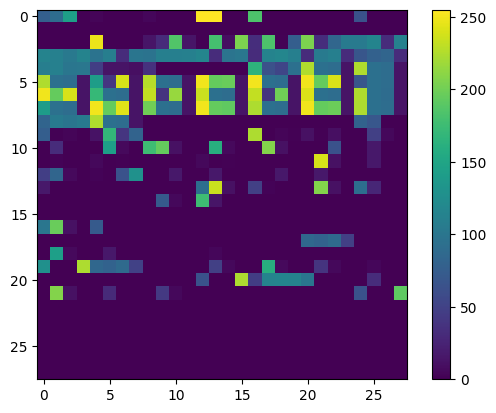

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Note that we can view the first 28x28 bytes of a PE file as an image.
# A byte with value 0 (or '0x00') has darkest color,
# while a byte with value 255 (or '0xFF') has brightest color.
# Below is the visualization of the first PE file.

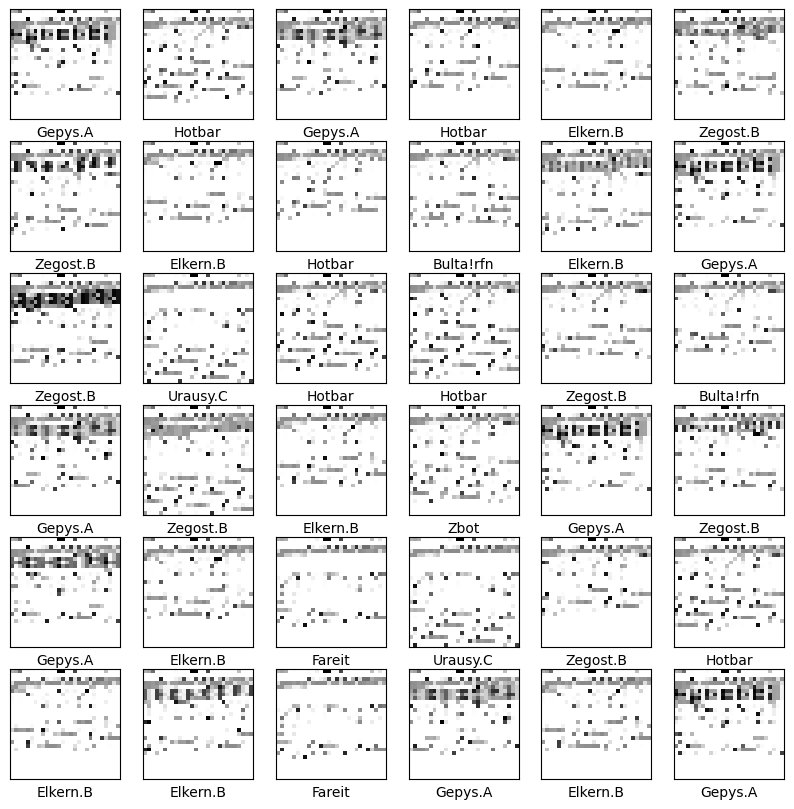

In [ ]:
# Here are the examples of 36 PE files,
# presented as 28x28 images.
# However, I use 'plt.cm.binary' to show only grey-scale color.
# You may try the following page to change to other colors.
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The above images are samples of different PE files. Could you visually distinguish them? Their labels are shown under each of the image.

Q1: Before building the model, if there is anything you can do to the data, do it right here.


In [ ]:
# Any preprocessing?

# 將圖片標準化為0~1
train_images = train_images / 255.0
# 將圖片reshape
train_images = train_images.reshape((-1, 28, 28, 1))

# 將classes變為one-hot encoding
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=len_classes)

### Build the model

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
# This is the model from tensorflow's example.
# Please try to modify it.

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(len_classes)
# ])
malware_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len_classes, activation='softmax')
], name='malware_model')

malware_model.summary()

Model: "malware_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_11 (Flatten)        (None, 576)             

In [ ]:
# This is the training sonfig from tensorflow's example.
# Please try to modify it.

# model.compile(optimizer='SGD',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# optimizer使用adam，loss因為前面改為one-hot encoding classes，所以使用categorical_crossentropy
malware_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Q2: Why the example use 'SparseCategoricalCrossentropy' and what is 'from_logits'? Is "SGD" good enough? (what if not?)

A2:
1. 當label以整數形式呈現時（例如 [0, 1, 2, ...]）而不是 one-hot en-coding時，通常會使用SparseCategoricalCrossentropy。
2. 當 from_logits 為 True 時，表示模型的輸出在計算loss時未經過 softmax activation function，而當loss為 'sparse_categorical_crossentropy' 時通常便是此類情況。但是如果模型的最後有使用softmax activation function，則應將 from_logits 設為 False。
3. SGD是根據loss function對參數的梯度更新模型的參數，但是速度通常會較Adam慢，因為Adam是隨每次偏微分的結果去調整每一步要走多大的算法，所以通常比 SGD 收斂更快，並且需要調整超參數的量較少。因此雖然 SGD 可以用於訓練，但 Adam 更為常用。

### Train the model

In [ ]:
epochs = 40

In [ ]:
# This is the fitting function from tensorflow's example.
# Please try to modify it.

# model.fit(train_images, train_labels, epochs=5)

# Train the model
history = malware_model.fit(train_images,
          train_labels_one_hot,
          batch_size= 32,
          epochs = epochs,
          verbose = 0,
          validation_split = 0.2,
          validation_data = None,
          shuffle = True,
      )


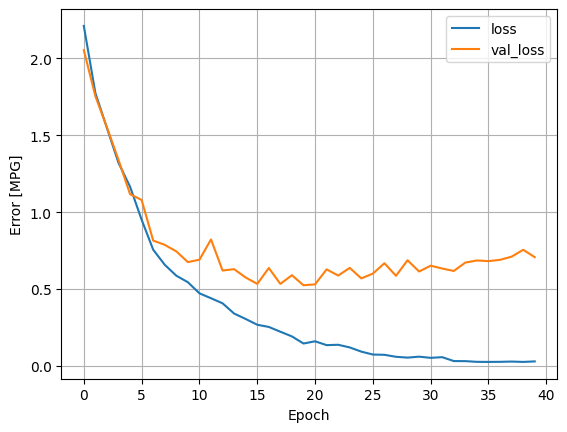

In [ ]:
plot_loss(history)

Q3: What is 'epochs'? How does it affect the result?

A3:Epochs指的是模型訓練資料集裡所有資料一次，即為一個epoch。如果epochs數量太少，可能會導致underfitting，而epochs的數量太多則可能導致overfitting，兩種情況對於模型的performance可能都不好。

Q4: What is 'split_validation' in model.fit()? Check it out in tensorflow's web page. Use it in your code.

A4: 'validation_split' 可以在訓練過程中将訓練數據分割成訓練集和驗證集

Q5: Could you exaplin the output of model.fit()? And what is your accuracy?

A5:在這裡model.fit()會回傳一個history，裡面包含了一些重要的資訊，例如history.params中有模型訓練的參數，例如 epochs 的數量和batch_size等等，而history.history包含了訓練過程中所有的accuracy、val_accuracy、loss、val_loss等等資訊，這些資訊可以藉由畫成圖表來觀察模型訓練時的行為模式，有時幫助判斷一些問題，例如模型是否有overfitting的問題。如果將accuracy以及loss畫出來即為下圖。

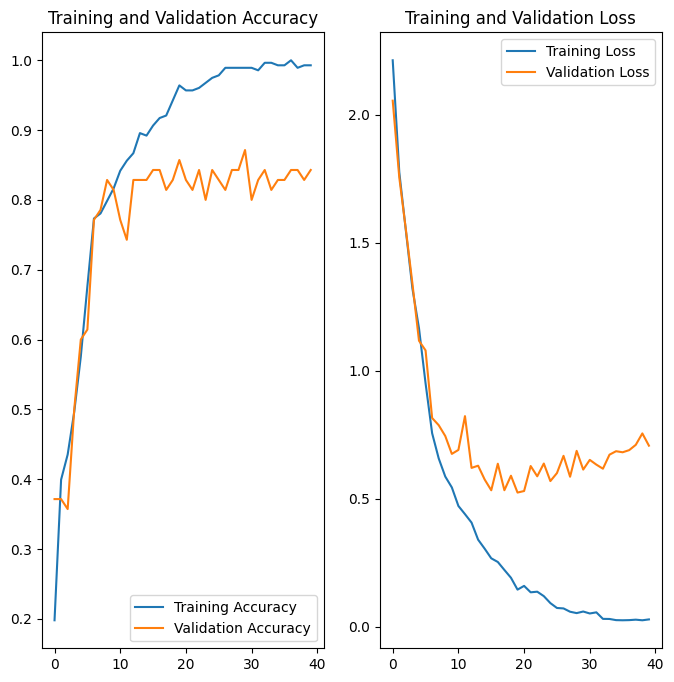

In [ ]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Q6: How do you know your model is not overfitted?

A6:我們可以依照上面的accuracy以及loss的圖觀察，如果模型在訓練集的loss持續縮小或是accuracy趨於穩定，但在validation data的loss卻逐漸增大或是accuracy的accuracy逐漸下降，可能代表模型已經overfitting。

Q7: Could you introduce 'early stop mechanism' in your code? Then, train the model again. "Early stop" means you can stop the epoch (without finishing all of them). You can prepare a validation data set and calculate your val_loss and val_accuracy at the end of each epoch. If you believe the val_loss will not improve for the next epoch, then you can stop the traning, to save time and to prevent overfitting. Does it works?

A7:下面的code即是引入earlystop，選定的是val_loss，依照計算的結果大約epochs設為17即可，再多可能就會造成overfitting，比起上面的epochs設為40，可解決大量的計算時間，且accuracy有些許的提升，對於模型的效能是有幫助的。

In [ ]:
# 引入早期停止機制
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0005,
    patience = 3,
    )

# 使用早期停止機制訓練模型

history = malware_model.fit(train_images,
          train_labels_one_hot,
          batch_size= 32 ,
          epochs = 40,
          verbose = 0,
          callbacks=[early_stop],
          validation_split = 0.2,
          validation_data = None,
          shuffle = True,
      )


In [ ]:
len(history.history['val_loss'])

17

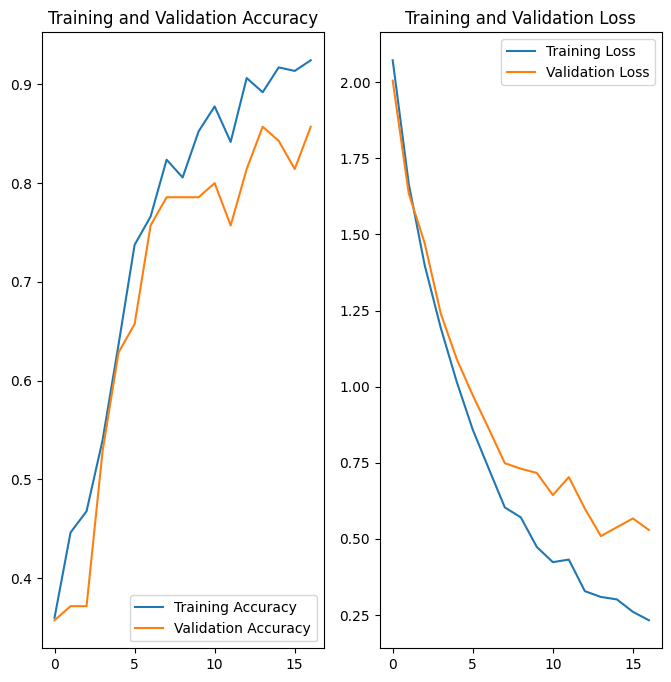

In [ ]:
epochs_range = range(len(history.history['val_loss'])) # <--- !!!!

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Q8: Any idea of improving the classification accuracy?

A8:以下是能增加模型accuracy的一些做法:
1. 也許可以再調整模型的架構，譬如添加更多的隱藏層、調整個隱藏層的neuron數量、將acitvation function改為其他函數等等作法。
2. 使用data augmentation來增加training data，例如旋轉、翻轉、縮放或添加noise等，也許可以幫助模型更好地學習數據的特徵。
3. 調整模型的hyperparamenters，例如batch size等等。

Q9: Try to understand the reshape() function from the following link. https://www.tensorflow.org/api_docs/python/tf/reshape  We haved modified the original Fashion MNIST/MNIST dataset and applied similar structure to our malware PE file dataset. But for a PE file, its header and content are not designed according to a 2d shape 28x28, why convolution still work? According to the PE file structure, a row should be 64 bits (or 8 bytes, see https://en.wikipedia.org/wiki/Portable_Executable) and rows has no relation (but image does). So, theoratically we do not need to use a 2d convolution to describe the relation between rows. Why 2d conv still looks good?


A9: 在PE file中，位元組之間仍可能存在某些關聯性，與圖形的像素之間的關係相似。所以就算PE file不是圖形，我們仍可以透過捲機神經網路模型學習到這些局部的特徵，幫助我們將PE file做分類。

Q10: use reshape() to transform the original 2d 28x28 inputs to a 1d 784 inputs, and try to use Conv1D() https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D to analyze our PE files. Does your accuracy of 1d model increase?

A10: 依照下圖的結果，1d model的accuracy反而有下降的現象，也許是因為降維造成二維原本有的特徵沒辦法被找到，而損失這些特徵造成分類起來變得比較困難，如此accuracy有所下降。




In [ ]:
# Reshape to 1D
train_images_1d = train_images.reshape((-1, 28 * 28))

# Conv1D model
model_1d = keras.Sequential([
    keras.layers.Reshape((28 * 28, 1), input_shape=(28 * 28,)),
    keras.layers.Conv1D(32, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len_classes, activation='softmax')
])

model_1d.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# 引入早期停止機制
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.0005,
    patience = 3,
    )

# Train the model
history_1d = model_1d.fit(train_images_1d,
          train_labels,
          batch_size= 32,
          epochs = 40,
          verbose = 0,
          callbacks = [early_stop],
          validation_split = 0.2,
          validation_data = None,
          shuffle = True,
      )


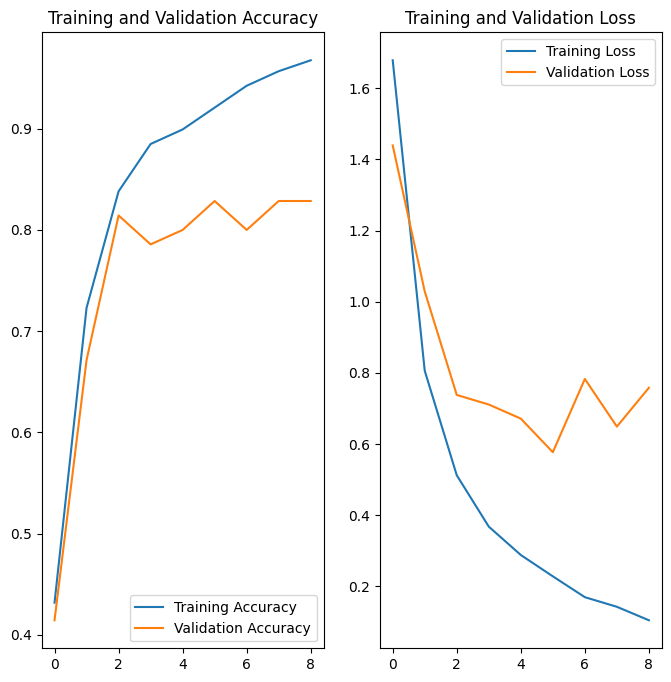

In [ ]:
epochs_range = range(len(history_1d.history['val_accuracy']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_1d.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history_1d.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_1d.history['loss'], label='Training Loss')
plt.plot(epochs_range, history_1d.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()